# Sistemas Inteligentes

## Laboratório 2 - Classificação

Neste laboratório serão introduzidos: **Linear Discriminant Analysis (LDA)**, **Support Vector Machine (SVM)** e **Artificial Neural Networks (ANN)**.

### Identificação do Aluno

#### Nome Completo

Matheus Prudencio dos Santos

#### RA

11114014

In [18]:
import warnings
warnings.filterwarnings('ignore')

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **dataset**.

Tendo feito o processo adequadamente, a variável dataset conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável X apenas o objeto images de dataset. Analogamente, atribua à variável y o objeto target.

Ainda nesta célula, utilize a função reshape do próprio X para forçar um formato unidimensional para cada imagem dentro do array X, que, originalmente, contém várias imagens com seus pixels distribuidos bidimensionalmente.

In [11]:
from sklearn.datasets import load_digits

dataset = load_digits()

x = dataset.images

y = dataset.target

x = x.reshape(1797,8*8)

(1797, 64)

#### Divisão dos dados em grupos para treinamento e teste.

Importe e utilize a função **train_test_split** (do pacote **model_selection**, que percente à biblioteca **sklearn**) para dividir os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **X_train**, **X_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split**.

In [15]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size =0.25)

print(' {}, {}, {}, {} '.format(x_treinamento.shape, x_teste.shape, y_treinamento.shape, y_teste.shape))

 (1347, 64), (450, 64), (1347,), (450,) 


### Linear Discriminant Analysis (LDA)

#### Treinamento

Importe o classificador do LDA, que é uma função chamada **LinearDiscriminantAnalysis** do pacote **discriminant_analysis**, que faz parte da biblioteca **sklearn**. Então crie o classificador com o nome **LDA** atribundo a ele a função **LinearDiscriminantAnalysis**.

Treine o classificador **LDA** por meio de sua própria função **fit()**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **X_train** e **y_train**.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()

LDA.fit(x_treinamento, y_treinamento)

C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### Classificação e Resultados

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **LDA**. O argumento da função é apenas a entrada de teste, ou seja, **X_test**. Atribua a saída dessa classificação à variável **y_pred_LDA**.

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**, então imprima a acurácia do classificador lda e sua confusion matrix.

In [26]:
y_pred_LDA = LDA.predict(x_teste)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_teste,y_pred_LDA))

print(confusion_matrix(y_teste,y_pred_LDA))

0.9555555555555556
[[41  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  2  0]
 [ 0  1 45  1  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  2  1]
 [ 0  0  0  0 44  0  0  1  0  0]
 [ 0  0  0  0  0 50  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 43  1  2]
 [ 0  2  0  0  0  1  0  1 40  1]
 [ 0  0  0  0  0  0  0  1  1 37]]


### Support Vector Machine (SVM)

#### Treinamento

Importe a função **LinearSVC**, pertencente ao pacote **svm** da biblioteca **sklearn**, então crie o classificador chamado **SVM**, análogo ao que foi feito com o LDA anteriormente.

Então, treine o classificador **SVM** utilizando a função **fit** com os dados de treinamento, **X_train** e **y_train**, respectivamente.

In [28]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

svm.fit(x_treinamento, y_treinamento)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Classificação e Resultados

Faça a classificação dos dados de entrada para testes, **X_test**, utilizando a função **predict** do próprio **SVM** e armazene os resultados em **y_pred_SVM**.

Na mesma célula, verifique a acurácia do classificador **SVM** por meio da função **accuracy_score** e mostre a matriz de confusão do classificador **SVM** utilizando a função **confusion_matrix**.

In [30]:
y_pred_SVM = svm.predict(x_teste)

print(accuracy_score(y_teste,y_pred_SVM))

print(confusion_matrix(y_teste,y_pred_SVM))

0.9355555555555556
[[40  0  1  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  8  0]
 [ 0  0 46  0  0  0  0  0  1  0]
 [ 0  0  0 40  0  3  0  1  1  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  1  2]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  2  0  1  0  0  0  0 42  0]
 [ 0  0  0  1  0  1  0  2  2 33]]


### Artificial Neural Networks (ANN)

#### Treinamento

Importe a função **MLPClassifier**, pertencente ao pacote **neural_network** da biblioteca **sklearn**, então crie o classificador **ANN** usando a função importada com os parâmetros e **hidden_layer_sizes=(50)**.

Depois, treine o classificador usando os dados de entrada e saída de treinamento.

In [33]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier(hidden_layer_sizes =(50))

ANN.fit(x_treinamento, y_treinamento)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Classificação e Resultados

Faça a predição com base nos dados de entrada de teste com o classificador **ANN**, atribundo as predições à variável **y_pred_ANN**. Então imprima a acurácia e a matriz de confusão dessa classificação.

In [34]:
y_pred_ANN = ANN.predict(x_teste)

print(accuracy_score(y_teste,y_pred_ANN))

print(confusion_matrix(y_teste,y_pred_ANN))

0.9622222222222222
[[39  0  1  0  0  0  1  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  0  1  1]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 49  1  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  1  0  0 43  1  1]
 [ 0  1  1  0  1  1  1  0 40  0]
 [ 0  0  0  1  0  0  0  0  1 37]]


#### Análise para diferentes quantidades de neurônios

Faça, iterativamente, com que seja treinada e testada uma rede neural de uma camada, utilizando uma quantidade crescente de neurônios, indo de 1 a 50. Armazene o valor da acurácia para cada iteração, então imprima as seguintes estatísticas sobre a acurácia: mínima, máxima, média, mediana, moda, variância e desvio padrão.

In [57]:
acuracias=[]
erros = []
h = 1
def iterativa(x) :
    if x <= 50:
        ANN = MLPClassifier(hidden_layer_sizes =(x))
        ANN.fit(x_treinamento, y_treinamento)
        y_pred_ANN = ANN.predict(x_teste)
        acuracias.append(accuracy_score(y_teste,y_pred_ANN))
        erro = (acuracias[x-1]-acuracias[x-2])**2
        erros.append(erro)
        iterativa(x+1)
    else:
        print(acuracias)

iterativa(h)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.1, 0.43777777777777777, 0.5044444444444445, 0.6444444444444445, 0.7911111111111111, 0.8822222222222222, 0.9333333333333333, 0.9133333333333333, 0.9222222222222223, 0.94, 0.92, 0.94, 0.94, 0.9355555555555556, 0.9466666666666667, 0.9377777777777778, 0.9644444444444444, 0.9444444444444444, 0.94, 0.9622222222222222, 0.9511111111111111, 0.9555555555555556, 0.9444444444444444, 0.9555555555555556, 0.9488888888888889, 0.96, 0.9711111111111111, 0.9466666666666667, 0.9511111111111111, 0.9511111111111111, 0.9622222222222222, 0.9511111111111111, 0.9666666666666667, 0.96, 0.9422222222222222, 0.9644444444444444, 0.9511111111111111, 0.9488888888888889, 0.98, 0.9688888888888889, 0.9555555555555556, 0.9733333333333334, 0.9466666666666667, 0.9688888888888889, 0.9555555555555556, 0.9577777777777777, 0.9711111111111111, 0.9644444444444444, 0.9755555555555555, 0.9533333333333334]


In [65]:
print(len(acuracias))
print(len(erros))
print(erros)

50
50
[0.0, 0.1140938271604938, 0.00444444444444445, 0.019600000000000003, 0.021511111111111095, 0.008301234567901241, 0.0026123456790123453, 0.0004000000000000007, 7.901234567901336e-05, 0.00031604938271604554, 0.0003999999999999963, 0.0003999999999999963, 0.0, 1.9753086419752355e-05, 0.00012345679012345593, 7.901234567901138e-05, 0.0007111111111111084, 0.0004000000000000007, 1.975308641975334e-05, 0.0004938271604938286, 0.00012345679012345593, 1.975308641975334e-05, 0.0001234567901234584, 0.0001234567901234584, 4.4444444444445016e-05, 0.00012345679012345593, 0.0001234567901234584, 0.0005975308641975332, 1.975308641975334e-05, 0.0, 0.00012345679012345593, 0.00012345679012345593, 0.00024197530864197497, 4.4444444444445016e-05, 0.0003160493827160495, 0.0004938271604938286, 0.0001777777777777771, 4.938271604938335e-06, 0.0009679012345678999, 0.00012345679012345593, 0.0001777777777777771, 0.0003160493827160495, 0.0007111111111111144, 0.0004938271604938286, 0.0001777777777777771, 4.9382716

Utilizando subplots, gere o gráfico da acurácia do classificador para cada quantidade de neurônios na camada da rede neural e o gráfico do erro, considerando como o erro a diferença entre as acurácias das últimas duas iterações para cada iteração.

No handles with labels found to put in legend.


Text(0,0.5,'Acuracia')

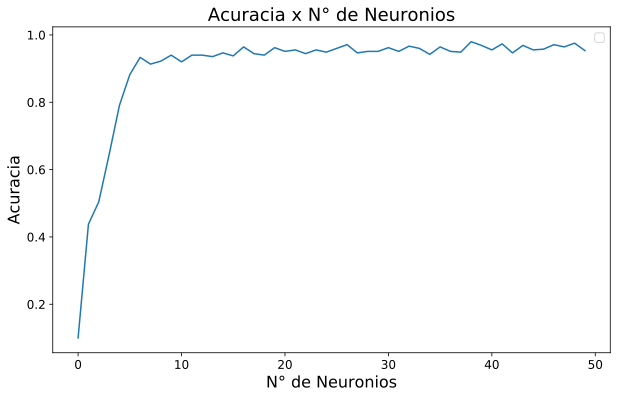

In [63]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

plt.plot(range(50), acuracias)
plt.legend()
plt.title('Acuracia x N° de Neuronios')
plt.xlabel('N° de Neuronios')
plt.ylabel('Acuracia')


No handles with labels found to put in legend.


Text(0,0.5,'erro')

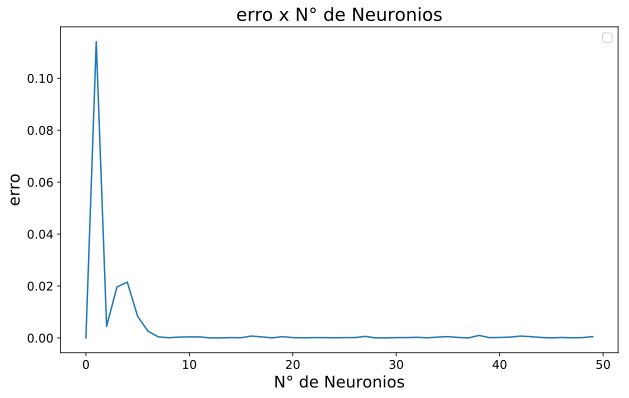

In [64]:
plt.plot(range(50), erros)
plt.legend()
plt.title('erro x N° de Neuronios')
plt.xlabel('N° de Neuronios')
plt.ylabel('erro')

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)